In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def binary_classifier_plots(file='iris_binary.csv'):
    data = pd.read_csv(file, sep=',')
    print(data.head())  # Display first few rows
    # Check for missing values
    # print(data.isnull().sum())
    # Plotting pairwise relationships
    sns.pairplot(data, hue='variety', markers=["o", "s"])
    plt.savefig('plots/binary/pairplot.png')  # Save the plot

def load_data(file='iris_binary.csv'):
    # Load the data
    data = pd.read_csv(file)
    # Display the first few rows
    print(data.head())
    # Map the 'variety' column to binary labels
    data['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 1})
    # Check for missing values
    print(data.isnull().sum())
    return data

def split_features_target(data):
    # Features - all columns except 'variety'
    X = data.drop('variety', axis=1)
    # Target variable
    y = data['variety']
    return X, y

def split_train_test(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Add a column of ones to include the bias (intercept) term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Initialize weights randomly
    theta = np.random.randn(X_b.shape[1], 1)
    m = len(X_b)
    for epoch in range(epochs):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y.values.reshape(-1,1))
        theta = theta - learning_rate * gradients
        #  print cost every 100 epochs, we see it going down
        if epoch % 100 == 0:
            cost = (1/m) * np.sum((X_b.dot(theta) - y.values.reshape(-1,1)) ** 2)
            print(f"Epoch {epoch}, Cost: {cost}")
    return theta

def predict_manual(X, theta):
    # Add bias term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    y_pred_continuous = X_b.dot(theta)
    return y_pred_continuous

def apply_threshold(y_pred_continuous, threshold=0.5):
    y_pred_class = (y_pred_continuous >= threshold).astype(int)
    return y_pred_class

def evaluate_model(y_test, y_pred_class):
    accuracy = accuracy_score(y_test, y_pred_class)
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    class_report = classification_report(y_test, y_pred_class)
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

def main():
    # Optional: Generate plots
    binary_classifier_plots()

    # Step 1: Load and preprocess the data
    data = load_data()

    # Step 2: Split features and target
    X, y = split_features_target(data)

    # Step 3: Split into training and testing sets
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # Step 4: Train the model using gradient descent
    theta = gradient_descent(X_train, y_train)

    # Step 5: Make predictions on the test set
    y_pred_continuous = predict_manual(X_test, theta)

    # Step 6: Apply the decision threshold to get back the class labels
    y_pred_class = apply_threshold(y_pred_continuous)

    # Step 7: Evaluate the model
    evaluate_model(y_test, y_pred_class)


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
Epoch 0, Cost: 1.1183282033061086
Epoch 100, Cost: 0.20868537168225743
Epoch 200, Cost: 0.17406899531764553
Epoch 300, Cost: 0.14

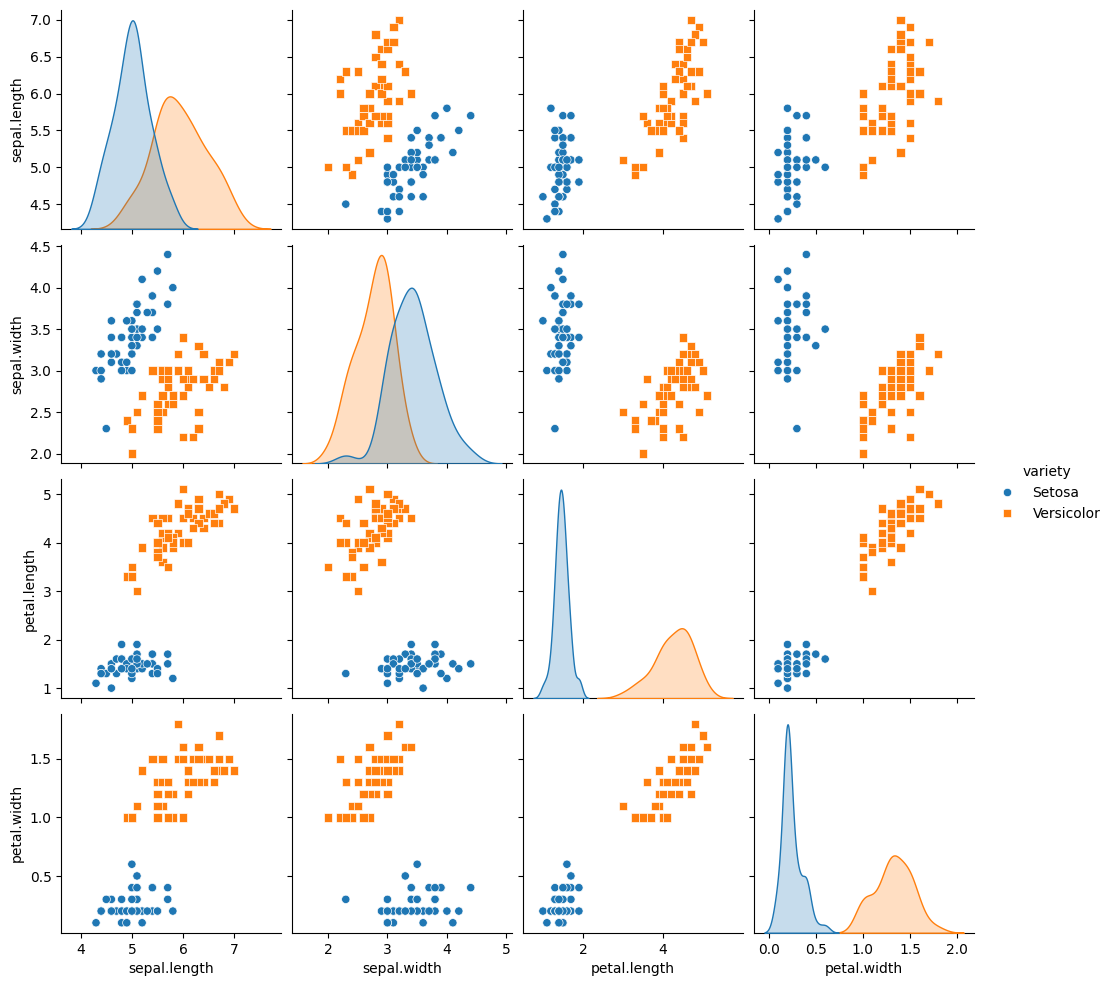

In [7]:
if __name__ == "__main__":
    main()

In [4]:
theta

NameError: name 'theta' is not defined

In [ ]:
# Step 1: Load and preprocess the data
data = load_data()

# Step 2: Split features and target
X, y = split_features_target(data)

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = split_train_test(X, y)

# Step 4: Train the model using gradient descent
theta = gradient_descent(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_continuous = predict_manual(X_test, theta)

# Step 6: Apply the decision threshold to get back the class labels
y_pred_class = apply_threshold(y_pred_continuous)

# Step 7: Evaluate the model
evaluate_model(y_test, y_pred_class)

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
Epoch 0, Cost: 2.2852545446282093
Epoch 100, Cost: 0.15889838680523527
Epoch 200, Cost: 0.13477004734196954
Epoch 300, Cost: 0.11628863153214733
Epoch 400, Cost: 0.10117695993450443
Epoch 500, Cost: 0.08878319651762556
Epoch 600, Cost: 0.07858391428475502
Epoch 700, Cost: 0.0701580658026668
Epoch 800, Cost: 0.06316689067140385
Epoch 900, Cost: 0.05733776954777157
Accuracy: 1.0
Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0      

In [6]:
theta

array([[-0.46018252],
       [-0.00376062],
       [ 0.13271647],
       [-0.2752031 ],
       [ 1.7214709 ]])